In [22]:
#packages for data analysis
import numpy as np
import pandas as pd
from sklearn import svm

#visualize you data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2) # seaborn sits on the top of matplotlib

#for didplaying graphics in browser setup
%matplotlib inline 

In [21]:
#read csv file  recipes_muffins_cupcakes.csv
recipes = pd.read_csv(r'C:\Users\Gaurav\Desktop\recipes_muffins_cupcakes.csv')
print (recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


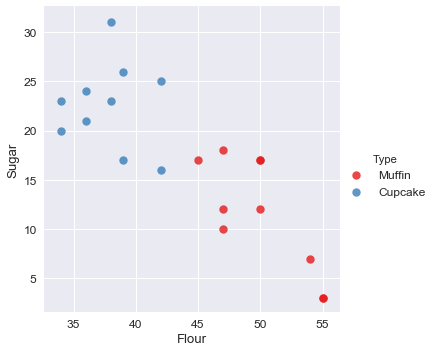

In [31]:
#plot our data
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70});

In [35]:
# format or preprocess our data
type_lable = np.where(recipes['Type']=='Muffin', 0, 1)
recipes_features = recipes.columns.values[1:].tolist()
recipes_features

ingredients = recipes[['Flour', 'Sugar']].values
ingredients1 = recipes[recipes_features].values
print(ingredients)
print(ingredients1)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]
[[55 28  3  7  5  2  0  0]
 [47 24 12  6  9  1  0  0]
 [47 23 18  6  4  1  0  0]
 [45 11 17 17  8  1  0  0]
 [50 25 12  6  5  2  1  0]
 [55 27  3  7  5  2  1  0]
 [54 27  7  5  5  2  0  0]
 [47 26 10 10  4  1  0  0]
 [50 17 17  8  6  1  0  0]
 [50 17 17 11  4  1  0  0]
 [39  0 26 19 14  1  1  0]
 [42 21 16 10  8  3  0  0]
 [34 17 20 20  5  2  1  0]
 [39 13 17 19 10  1  1  0]
 [38 15 23 15  8  0  1  0]
 [42 18 25  9  5  1  0  0]
 [36 14 21 14 11  2  1  0]
 [38 15 31  8  6  1  1  0]
 [36 16 24 12  9  1  1  0]
 [34 17 23 11 13  0  1  0]]


In [40]:
# fir our model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_lable)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
#get the seperating hyperplane
w= model.coef_[0]
a= -w[0] / w[1]
xx= np.linspace(30,60)
yy= a * xx - (model.intercept_[0]) / w[1]
#print (yy)

#plot the parrallels to the seperating hyperplane that pass through the support vectors
b=model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b= model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

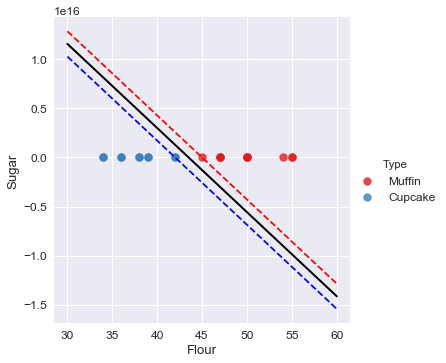

In [52]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70});
plt.plot(xx,yy, linewidth = 2, color='black')
plt.plot(xx, yy_down, 'k--', color= 'red')
plt.plot(xx, yy_up, 'k--', color = 'blue')

In [53]:
# create a func to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print("its a muffin recipe")
    else:
        print("its a cupcake recipe")
        
#predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50,20)

its a muffin recipe


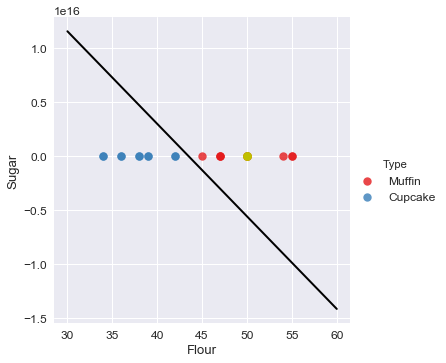

In [54]:
#plotting on graph
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70});
plt.plot(xx,yy, linewidth = 2, color='black')
plt.plot(50, 20, 'yo', markersize='9')